In [104]:
# import libraries
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as signal
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy
import peakutils
import math
import datetime
from datetime import datetime
import xlrd

In [7]:
#import all data
Ac225foilCountDirectory="count_room_data/experiment/225Ac"
Ac225files = glob.glob(Ac225foilCountDirectory+'*.Spe')
foilCountDirectory="count_room_data/experiment/monitor_foils/"
foilfiles = glob.glob(foilCountDirectory+'*.Spe')
BaCalibrationCountDirectory="count_room_data/calibration/Ba133/"
EuCalibrationCountDirectory="count_room_data/calibration/Eu152/"
CsCalibrationCountDirectory="count_room_data/calibration/Cs137/"
calibrationfiles=glob.glob(BaCalibrationCountDirectory+'*.Spe')
calibrationfiles+=glob.glob(EuCalibrationCountDirectory+'*.Spe')
calibrationfiles+=glob.glob(CsCalibrationCountDirectory+'*.Spe')


In [8]:
#cell energy calibration
def chan2E(channel):
        b0=-.07173963760775197
        b1=.18743348208034852
        E=b0+b1*channel
        return E

In [9]:
#cell energy decalibration
def E2chan(E):
        b0=-.07173963760775197
        b1=.18743348208034852
        channel=(E-b0)/b1
        return channel

In [10]:
#calculate the percent of decays hitting the detector
def percentDecays(radius):
    detectorRadius=5
    detectorArea=math.pi*detectorRadius**2
    surfaceArea=4*math.pi*radius**2
    percent=detectorArea/surfaceArea
    return percent

In [11]:
#activity at t_0
def activityNaught(activityT, varlambda, time):
    return activityT/(math.e**(-1*varlambda*time))

In [244]:
#activity at t_n
def activityN(activityNaught, varlambda, time):
    return activityNaught*(math.e**(-1*varlambda*time))

In [12]:
#activity production and decay
def activityProdDecay(varlambda, time, reactionrate):
    return reactionrate(1-math.e**(-varlambda*time))

array([0., 0., 0., ..., 0., 0., 0.])

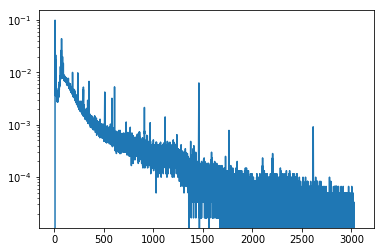

In [13]:
# **BACKGROUND**

# Loop through files, create pandas panda frame
df = pd.read_table('count_room_data/calibration/background.Spe')
backgroundData  = np.array(df['$SPEC_ID:'][11:16395], dtype='float')
backgroundDataLiveTime= int(df['$SPEC_ID:'][8].split(' ')[0])
backgroundDataByChanSec=backgroundData/backgroundDataLiveTime
chan = np.linspace(1,len(backgroundData), len(backgroundData))
plt.semilogy(chan2E(chan), backgroundDataByChanSec)
plt.plot()
backgroundDataByChanSec



In [14]:
#**BEAMDATA**
beamData = pd.read_excel('beamLog.xlsx')



In [182]:
#**CALIBRATION**
calibrationCharacterization = pd.read_excel('calibrationCharacterization.xlsx','calibrationSources')
calibrationDecays = pd.read_excel('calibrationCharacterization.xlsx','decays')

calibrationData=pd.merge(calibrationCharacterization, calibrationDecays, on='Source', how='left')
calibrationData['relativeActivity']=calibrationData['Activity(Bq)']*calibrationData['Intensity']
calibrationData



Source  DateOfAssay  Activity(Bq)     t1/2      t1/2(s)  Intensity  \
0    Ba133     20090101         39890  10.551y  332736336.0   0.329000   
1    Ba133     20090101         39890  10.551y  332736336.0   0.021400   
2    Ba133     20090101         39890  10.551y  332736336.0   0.026500   
3    Ba133     20090101         39890  10.551y  332736336.0   0.183400   
4    Ba133     20090101         39890  10.551y  332736336.0   0.620500   
5    Ba133     20090101         39890  10.551y  332736336.0   0.089400   
6    Eu152     20090101         39290  13.517y  426272112.0   0.000005   
7    Eu152     20090101         39290  13.517y  426272112.0   0.285300   
8    Eu152     20090101         39290  13.517y  426272112.0   0.000051   
9    Eu152     20090101         39290  13.517y  426272112.0   0.000007   
10   Eu152     20090101         39290  13.517y  426272112.0   0.000205   
11   Eu152     20090101         39290  13.517y  426272112.0   0.000009   
12   Eu152     20090101         39290  13.517y  426272112.0   0.000011   
13   Eu152     20090101         39290  13.517y  426272112.0   0.000073   
14   Eu152     20090101         39290  13.517y  426272112.0   0.000043   
15   Eu152     20090101         39290  13.517y  426272112.0   0.000038   
16   Eu152     20090101         39290  13.517y  426272112.0   0.000207   
17   Eu152     20090101         39290  13.517y  426272112.0   0.000063   
18   Eu152     20090101         39290  13.517y  426272112.0   0.000030   
19   Eu152     20090101         39290  13.517y  426272112.0   0.075500   
20   Eu152     20090101         39290  13.517y  426272112.0   0.000670   
21   Eu152     20090101         39290  13.517y  426272112.0   0.000078   
22   Eu152     20090101         39290  13.517y  426272112.0   0.000006   
23   Eu152     20090101         39290  13.517y  426272112.0   0.000346   
24   Eu152     20090101         39290  13.517y  426272112.0   0.000098   
25   Eu152     20090101         39290  13.517y  426272112.0   0.000014   
26   Eu152     20090101         39290  13.517y  426272112.0   0.004400   
27   Eu152     20090101         39290  13.517y  426272112.0   0.000101   
28   Eu152     20090101         39290  13.517y  426272112.0   0.000021   
29   Eu152     20090101         39290  13.517y  426272112.0   0.001213   
..     ...          ...           ...      ...          ...        ...   
95   Eu152     20090101         39290  13.517y  426272112.0   0.002720   
96   Eu152     20090101         39290  13.517y  426272112.0   0.000011   
97   Eu152     20090101         39290  13.517y  426272112.0   0.000197   
98   Eu152     20090101         39290  13.517y  426272112.0   0.000080   
99   Eu152     20090101         39290  13.517y  426272112.0   0.001400   
100  Eu152     20090101         39290  13.517y  426272112.0   0.145100   
101  Eu152     20090101         39290  13.517y  426272112.0   0.000079   
102  Eu152     20090101         39290  13.517y  426272112.0   0.006590   
103  Eu152     20090101         39290  13.517y  426272112.0   0.000007   
104  Eu152     20090101         39290  13.517y  426272112.0   0.000106   
105  Eu152     20090101         39290  13.517y  426272112.0   0.101100   
106  Eu152     20090101         39290  13.517y  426272112.0   0.136700   
107  Eu152     20090101         39290  13.517y  426272112.0   0.000372   
108  Eu152     20090101         39290  13.517y  426272112.0   0.014150   
109  Eu152     20090101         39290  13.517y  426272112.0   0.000009   
110  Eu152     20090101         39290  13.517y  426272112.0   0.001870   
111  Eu152     20090101         39290  13.517y  426272112.0   0.001010   
112  Eu152     20090101         39290  13.517y  426272112.0   0.000036   
113  Eu152     20090101         39290  13.517y  426272112.0   0.000258   
114  Eu152     20090101         39290  13.517y  426272112.0   0.000043   
115  Eu152     20090101         39290  13.517y  426272112.0   0.208700   
116  Eu152     20090101         39290  13.517y  426272112.0   0.000025   
117  Eu1

In [243]:
# **CALIBRATION**
#Init a dict for data, distance, foil type
dictCalibrationCount={}
dictCalibrationDistance={}
dictCalibrationType={}
dictCalibrationStartTime={}
dictCalibrationLiveTime={}


# Loop through files, create pandas panda frame
for file in calibrationfiles:
    name = file.split('/')[3]
    df = pd.read_table(file)
    data  = np.array(df['$SPEC_ID:'][11:16395], dtype='float')
    distance=file[file.find('cm')-2:file.find('cm')]
    foilType=name[11:16]
    dictCalibrationCount[name] = data
    dictCalibrationDistance[name]=int(distance)
    dictCalibrationType[name]=foilType
    dictCalibrationStartTime[name]=(df['$SPEC_ID:'][6])
    dictCalibrationLiveTime[name]= int(df['$SPEC_ID:'][8].split(' ')[0])
keysCalibrationCount = list(dictCalibrationCount.keys())

In [252]:
##DETECTOR EFFICIENCY
##**time from assay date to measurement date, theoretical activity for each source/distance**
calibrationCalculations=pd.DataFrame(columns=['fileName','source','distance', 'elapsedTime','calculatedA(t)'])
for name in keysCalibrationCount:
    measurementDatetime=datetime.strptime(dictCalibrationStartTime[name],'%m/%d/%Y %H:%M:%S')
    assayDatetime = datetime.strptime(str(int(calibrationCharacterization['DateOfAssay'][calibrationCharacterization['Source']==dictCalibrationType[name]])), "%Y%m%d")
    elapsedTime=(measurementDatetime-assayDatetime).total_seconds()
    calculatedActivity=activityN(
        int(calibrationCharacterization['Activity(Bq)'][calibrationCharacterization['Source']==dictCalibrationType[name]]),
        math.log(2)/int(calibrationCharacterization['t1/2(s)'][calibrationCharacterization['Source']==dictCalibrationType[name]]),
        (measurementDatetime-assayDatetime).total_seconds())
    calibrationCalculations=calibrationCalculations.append(
        {'fileName':name,
         'source':dictCalibrationType[name],
         'distance':dictCalibrationDistance[name],
        'elapsedTime':elapsedTime,
        'calculatedA(t)':calculatedActivity},ignore_index=True)

    

In [255]:
## DETECTOR CALIBRATION
##**Cs137
count=0
for name in keysCalibrationCount:
    if dictCalibrationType[name]=='Cs137':
        count=count+1
print(count)


8


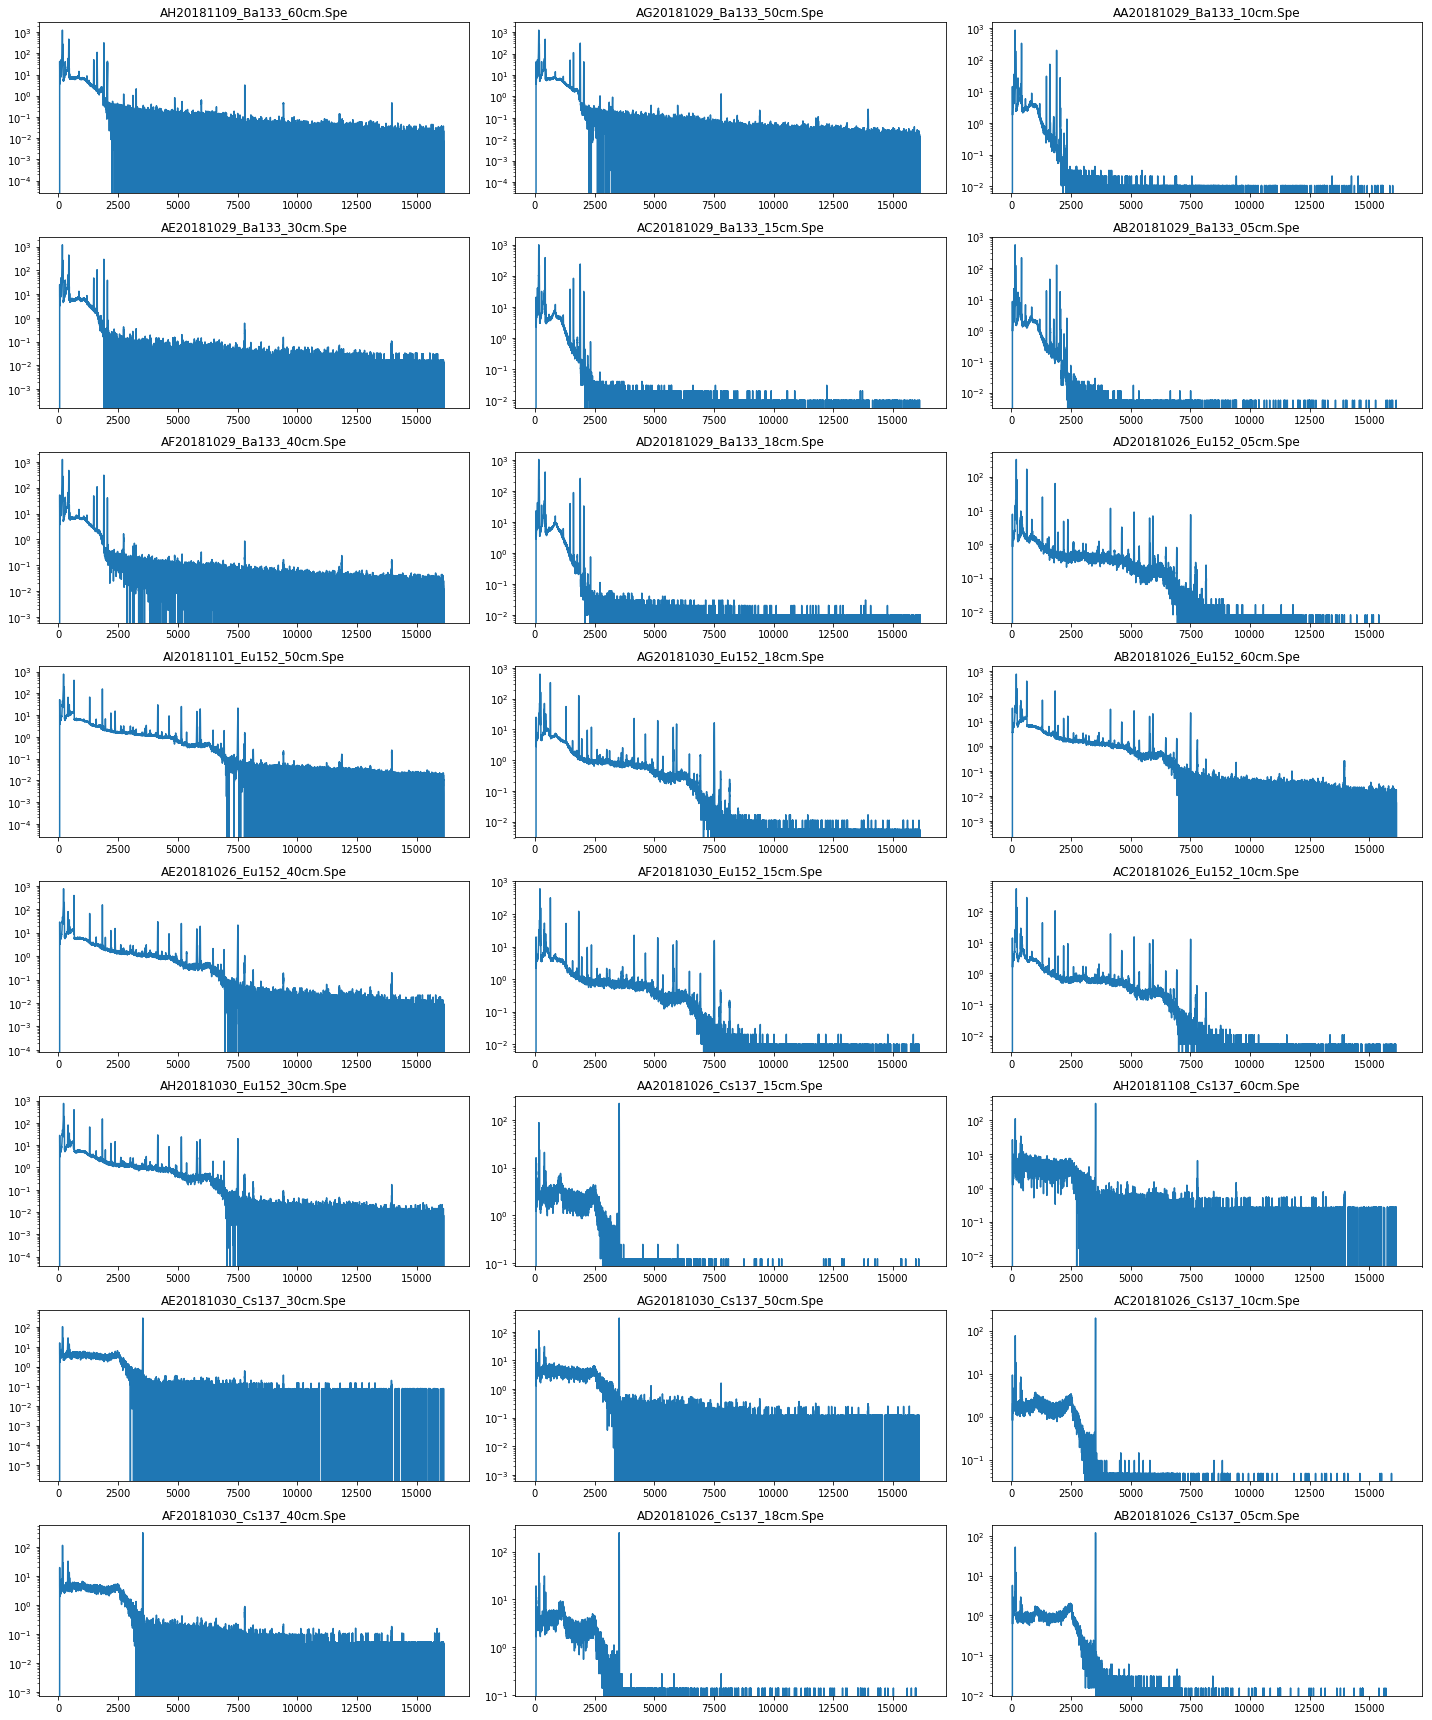

In [55]:
#**CALIBRATION**
# subplots for each calibration file at distance
plt.figure(figsize=(20,len(dictCalibrationCount)))
i = 1
for name in keysCalibrationCount:
    plt.subplot(int(len(dictCalibrationCount)/3),3,i)
    chan = np.linspace(1,len(dictCalibrationCount[name]), len(dictCalibrationCount[name]))
    #if calibration is >18 cm it is outside of the detector. we would need to subtract background radiation
    if dictCalibrationDistance[name]>18:
        plt.semilogy(chan, ((dictCalibrationCount[name]-backgroundDataByChanSec*dictCalibrationLiveTime[name])/percentDecays(dictCalibrationDistance[name])/dictCalibrationLiveTime[name]))
    else: plt.semilogy(chan, (dictCalibrationCount[name]/percentDecays(dictCalibrationDistance[name])/dictCalibrationLiveTime[name]))
    plt.plot()
    plt.title(name)
    i = i+1
plt.tight_layout()

In [36]:
# **FOILS**
#Init a dict for data, distance, foil type
dictFoilCount = {}
dictFoilDistance={}
dictFoilType={}
dictFoilStartTime={}
dictFoilLiveTime={}


# Loop through files, create pandas panda frame
for file in foilfiles:
    name = file.split('/')[3]
    df = pd.read_table(file)
    data  = np.array(df['$SPEC_ID:'][11:16395], dtype='float')
    distance=file[file.find('cm')-2:file.find('cm')]
    if name[9:13].find('_')==-1:
        foilType=name[9:13]
    else: foilType=name[9:12]
    dictFoilCount[name] = data
    dictFoilDistance[name]=int(distance)
    dictFoilType[name]=foilType
    dictFoilStartTime[name]=(df['$SPEC_ID:'][6])
    dictFoilLiveTime[name]= int(df['$SPEC_ID:'][8].split(' ')[0])
keysFoilCount = list(dictFoilCount.keys())


In [52]:
#**FOILS**
#data frame for foil characterization

foilCharacterization = pd.read_excel('foil_masses.xlsx')
print(foilCharacterization)
#indiumMass=float(foilCharacterization.mass[foilCharacterization['FoilID']=='In01'])
#indiumMass


foilReactions = pd.read_excel('FoilReactions.xlsx','FoilReactions')
foilIsotopeDecays = pd.read_excel('FoilReactions.xlsx','IsotopeGammaDecay')
foilReactionData=pd.merge(foilReactions, foilIsotopeDecays, on='Product', how='left')
pd.merge(foilCharacterization,foilReactionData, on="Foil")

  FoilID Foil    mass  Order  Thickness  DistanceFromBeam
0   In01   In  0.2869      5       0.50              2.28
1   In02   In  0.2877      6       0.50              2.78
2    Y01    Y  0.2700      3       0.64              1.00
3    Y02    Y  0.2628      4       0.64              1.64
4   Ni01   Ni  0.6793      7       1.00              3.28
5   Ni02   Ni  0.6723      8       1.00              4.28
6   Zr01   Zr  0.2616      1       0.50              0.00
7   Zr02   Zr  0.2562      2       0.50              0.50


FoilID Foil    mass  Order  Thickness  DistanceFromBeam Isotope  \
0     In01   In  0.2869      5       0.50              2.28   113In   
1     In01   In  0.2869      5       0.50              2.28   113In   
2     In01   In  0.2869      5       0.50              2.28   113In   
3     In01   In  0.2869      5       0.50              2.28   113In   
4     In01   In  0.2869      5       0.50              2.28   113In   
5     In01   In  0.2869      5       0.50              2.28   113In   
6     In01   In  0.2869      5       0.50              2.28   113In   
7     In01   In  0.2869      5       0.50              2.28   115In   
8     In01   In  0.2869      5       0.50              2.28   115In   
9     In01   In  0.2869      5       0.50              2.28   115In   
10    In01   In  0.2869      5       0.50              2.28   115In   
11    In01   In  0.2869      5       0.50              2.28   115In   
12    In01   In  0.2869      5       0.50              2.28   115In   
13    In02   In  0.2877      6       0.50              2.78   113In   
14    In02   In  0.2877      6       0.50              2.78   113In   
15    In02   In  0.2877      6       0.50              2.78   113In   
16    In02   In  0.2877      6       0.50              2.78   113In   
17    In02   In  0.2877      6       0.50              2.78   113In   
18    In02   In  0.2877      6       0.50              2.78   113In   
19    In02   In  0.2877      6       0.50              2.78   113In   
20    In02   In  0.2877      6       0.50              2.78   115In   
21    In02   In  0.2877      6       0.50              2.78   115In   
22    In02   In  0.2877      6       0.50              2.78   115In   
23    In02   In  0.2877      6       0.50              2.78   115In   
24    In02   In  0.2877      6       0.50              2.78   115In   
25    In02   In  0.2877      6       0.50              2.78   115In   
26     Y01    Y  0.2700      3       0.64              1.00     89Y   
27     Y01    Y  0.2700      3       0.64              1.00     89Y   
28     Y01    Y  0.2700      3       0.64              1.00     89Y   
29     Y01    Y  0.2700      3       0.64              1.00     89Y   
..     ...  ...     ...    ...        ...               ...     ...   
84    Zr01   Zr  0.2616      1       0.50              0.00    92Zr   
85    Zr01   Zr  0.2616      1       0.50              0.00    92Zr   
86    Zr01   Zr  0.2616      1       0.50              0.00    94Zr   
87    Zr01   Zr  0.2616      1       0.50              0.00    94Zr   
88    Zr01   Zr  0.2616      1       0.50              0.00    94Zr   
89    Zr01   Zr  0.2616      1       0.50              0.00    94Zr   
90    Zr01   Zr  0.2616      1       0.50              0.00    96Zr   
91    Zr01   Zr  0.2616      1       0.50              0.00    96Zr   
92    Zr01   Zr  0.2616      1       0.50              0.00    96Zr   
93    Zr01   Zr  0.2616      1       0.50              0.00    96Zr   
94    Zr02   Zr  0.2562      2       0.50              0.50    90Zr   
95    Zr02   Zr  0.2562      2       0.50              0.50    90Zr   
96    Zr02   Zr  0.2562      2       0.50              0.50    90Zr   
97    Zr02   Zr  0.2562      2       0.50              0.50    90Zr   
98    Zr02   Zr  0.2562      2       0.50              0.50    91Zr   
99    Zr02   Zr  0.2562      2       0.50              0.50    91Zr   
100   Zr02   Zr  0.2562      2       0.50              0.50    91Zr   
101   Zr02   Zr  0.2562      2       0.50              0.50    91Zr   
102   Zr02   Zr  0.2562      2       0.50              0.50    92Zr   
103   Zr02   Zr  0.2562      2       0.50              0.50    92Zr   
104   Zr02   Zr  0.2562      2       0.50              0.50    92Zr   
105   Zr02   Zr  0.2562      2       0.50              0.50    92Zr   
106   Zr02   Zr  0.2562      2       0.50              0.50    94Zr   
107   Zr02   Zr  0.2562      2       0.50              0.50    94Zr   
108   Zr02   Zr  0.2562     

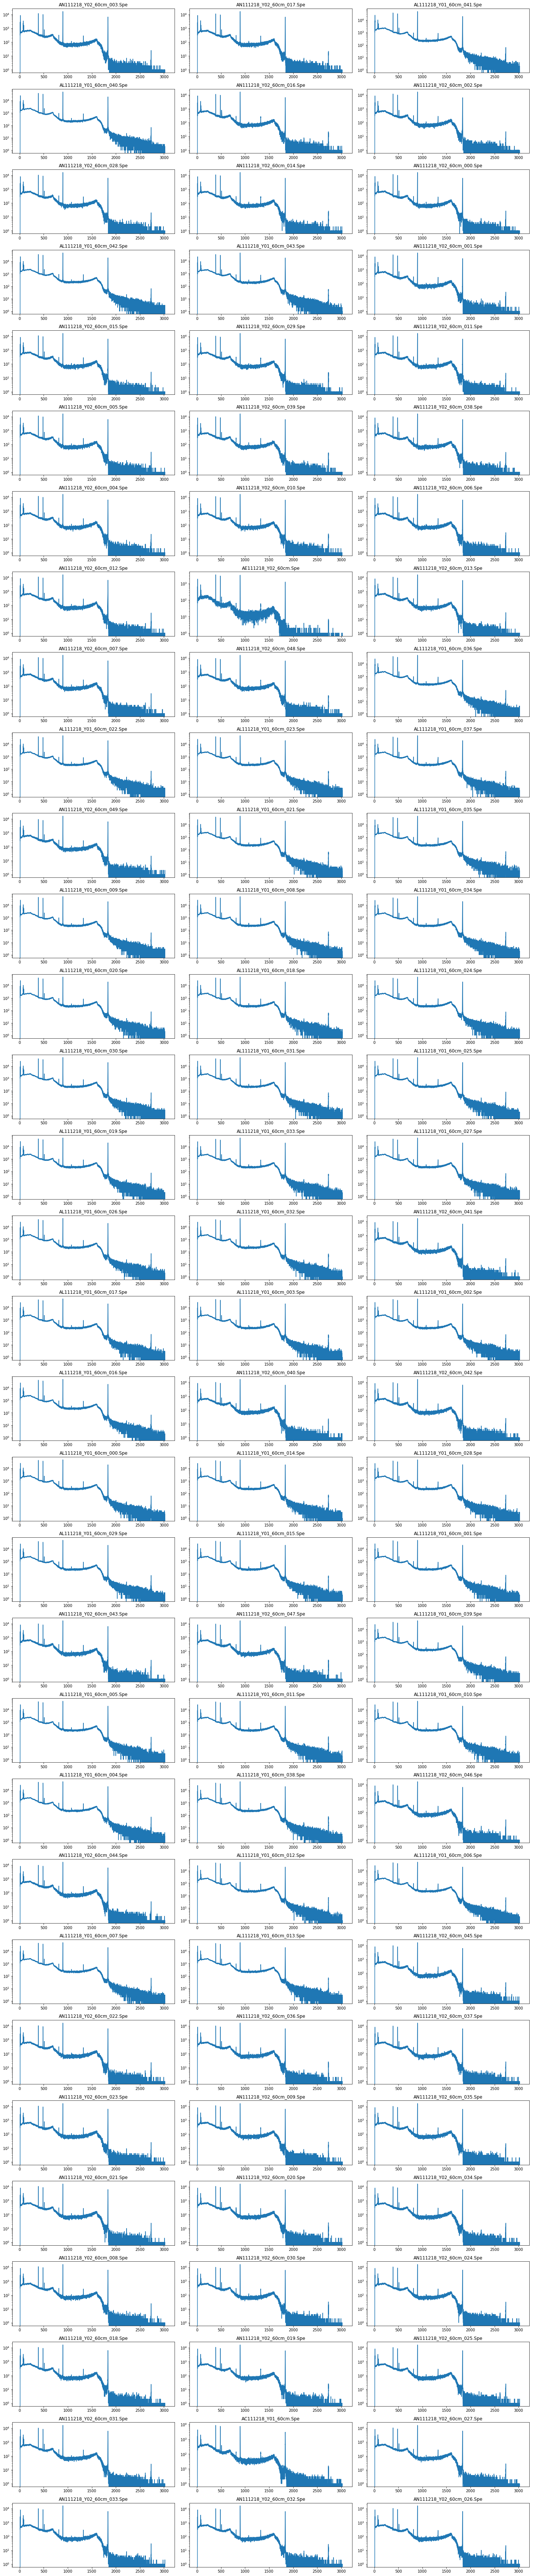

In [48]:
#**FOILS**
# subplots for each foil at distance
plt.figure(figsize=(20,len(dictFoilCount)))
i = 1
for name in keysFoilCount:
    if name.find('Y')!=-1:
        plt.subplot(int(len(dictFoilCount)/3),3,i)
        chan = np.linspace(1,len(dictFoilCount[name]), len(dictFoilCount[name]))
        plt.semilogy(chan2E(chan), dictFoilCount[name])
        plt.plot()
        plt.title(name)
        i = i+1
plt.tight_layout()


In [54]:
max(dictFoilCount['AN111218_Y02_60cm_003.Spe'])

16204.0

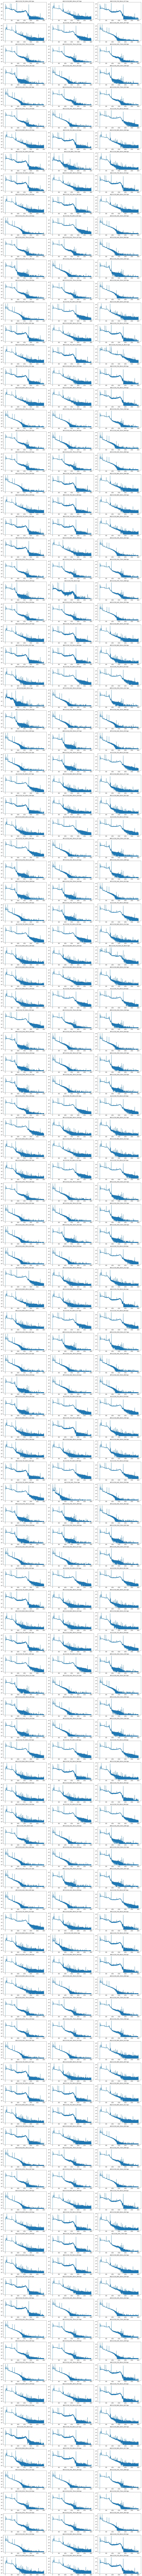

In [20]:
#**FOILS**
# subplots for each foil at distance
plt.figure(figsize=(20,len(dictFoilCount)))
i = 1
for name in keysFoilCount:
    plt.subplot(int(len(dictFoilCount)/3),3,i)
    chan = np.linspace(1,len(dictFoilCount[name]), len(dictFoilCount[name]))
    plt.semilogy(chan2E(chan), dictFoilCount[name])
    plt.plot()
    plt.title(name)
    i = i+1
plt.tight_layout()

/Users/Catherine/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0



ValueError: num must be 1 <= num <= 18, not 19

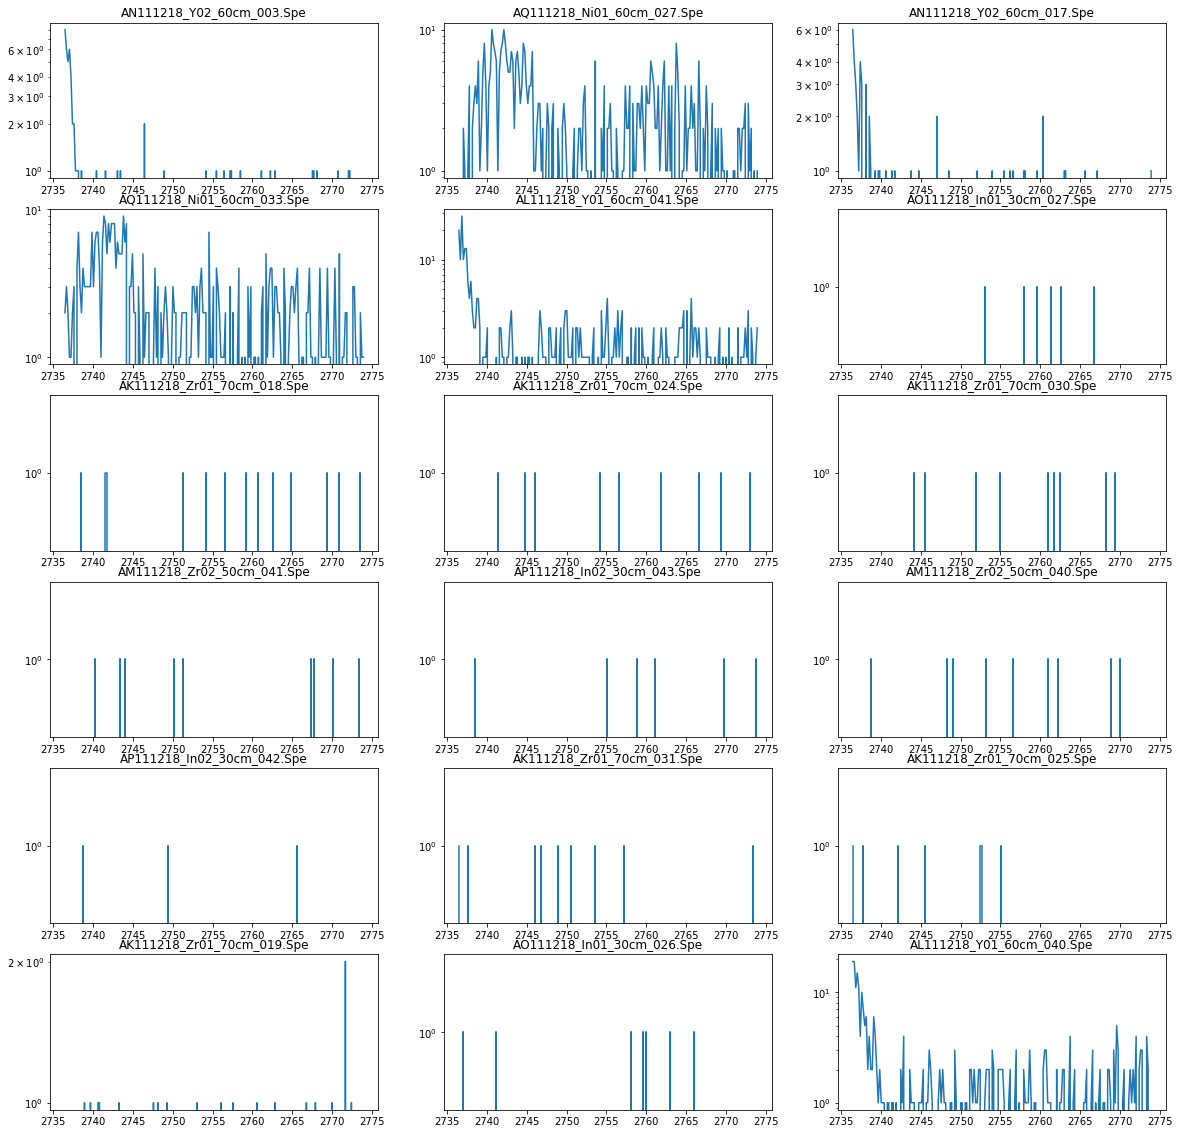

In [21]:
left_endpt=14600
right_endpt=14800
plt.figure(figsize=(20,20))
i = 1
for name in keysFoilCount:
    plt.subplot(6,3,i)
    chan = np.linspace(left_endpt, right_endpt, right_endpt-left_endpt)
    plt.semilogy(chan2E(chan), dictFoilCount[name][left_endpt:right_endpt])
    plt.plot()
    plt.title(name)
    i = i+1
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,20))
dictMaxGamma={}
dictMaxChannel={}
i = 1
for name in keysFoilCount:
    maxGamma=dictFoilCount[name][left_endpt]
    maxChannel=0
    j=[i for i in range(left_endpt,right_endpt)]
    for j in range(left_endpt,right_endpt):
        if dictFoilCount[name][j]>maxGamma:
            maxGamma=int(dictFoilCount[name][j])
            maxChannel=j
    dictMaxGamma[name]=maxGamma
    dictMaxChannel[name]=maxChannel
    i+=1
for name in keysFoilCount:
    print (name, dictMaxGamma[name], dictMaxChannel[name])

In [5]:
x = data[:,2]
y = data[:,3]
mean = sum(x*y)
sigma = sum(y*(x - mean)**2)

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, x, y, p0 = [1, mean, sigma])
plt.plot(x, gauss_function(x, *popt), label='fit')

# plot data

plt.plot(x, y,'b')

# Add some axis labels

plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

plt.figure(figsize=(20,20))
i = 1
for name in keysFoilCount:
    plt.subplot(6,3,i)
    chan = np.linspace(left_endpt, right_endpt, right_endpt-left_endpt)
    count=dictFoilCount[name][left_endpt:right_endpt]
    
    plt.semilogy(chan2E(chan), dictFoilCount[name][left_endpt:right_endpt])
    plt.plot()
    plt.title(name)
    i = i+1
plt.tight_layout()

NameError: name 'data' is not defined